In [ ]:
# default_exp timeseries

# timeseries

> Anomaly detection for time series

In [ ]:
#export
import numpy as np
import pandas as pd

from pyanomaly.stats import MAD, Tukey
from pyanomaly.utils import plot_anomalies

## Seasonal-ESD / Seasonal-MAD

Seasonal-ESD is an Anomaly Detection algorithm created by Twitter for time series data, according to their paper: 

 - We developed two novel statistical techniques for automatically detecting anomalies in cloud infrastructure data. Specifically, the  techniques employ statistical learning to detect anomalies in both application, and system metrics. Seasonal decomposition is employed to filter the trend and seasonal components of the time series, followed by the use of robust statistical metrics – median and median absolute deviation (MAD) – to accurately detect anomalies, even in the presence of seasonal spikes

There is already the implementation provided by **Twitter** in the **R** language, next we have the implementation of the algorithm made in Python.

Paper: https://arxiv.org/pdf/1704.07706.pdf

Note: Implementation is currently using MAD instead of ESD

In [ ]:
#export
from statsmodels.tsa.seasonal import STL

def smad(ts, m=3.0, period=None, stl_seasonal=25, 
         only_low_values=False, score=False):
    ''' 
        Seasonal-MAD
        
        Input:
            ts: pd.Series with DateTimeIndex
            m:  stardard deviation
            period: time series seasonal periodo
            stl_seasonal: STL Seasonal parameter
            only_low_values: return anomalies only for low values
            score: if True returns the decision function
        Output:
    '''
    # Seasonal component according to the Papper
    if period is not None:
        stl = STL(ts, period=period, seasonal=stl_seasonal)
    else:
        stl = STL(ts, seasonal=stl_seasonal)
    res = stl.fit() # fit
    # calculamos o residuo
    residuo = ts - np.nanmedian(ts) - res.seasonal
    # Search outlier with mad
    mad = MAD(only_low_values=only_low_values)
    mad.fit(residuo)
    # return
    if score:
        return mad.decision_function(residuo)
    else:
        index = mad.predict(residuo, m=m).index
        return ts.loc[index]

# Using S-MAD

In [ ]:
df = pd.read_csv('./dados/rec-center-hourly.csv', parse_dates=[0])
df.set_index('datetime', inplace=True)
df.head()

,kw_energy_consumption
datetime,
2010-07-02 00:00:00,21.2
2010-07-02 01:00:00,16.4
2010-07-02 02:00:00,4.7
2010-07-02 03:00:00,4.7
2010-07-02 04:00:00,4.6


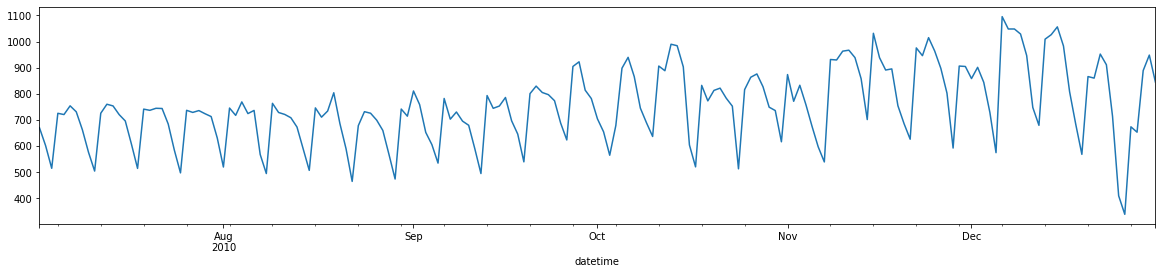

In [ ]:
ts = df['kw_energy_consumption']
ts = ts.resample('1D').sum()
ts.plot(figsize=(20, 4));

In [ ]:
# find anomalies
anomalies = smad(ts, period=7, only_low_values=True, m=3.0)
anomalies

Series([], Freq: D, Name: kw_energy_consumption, dtype: float64)

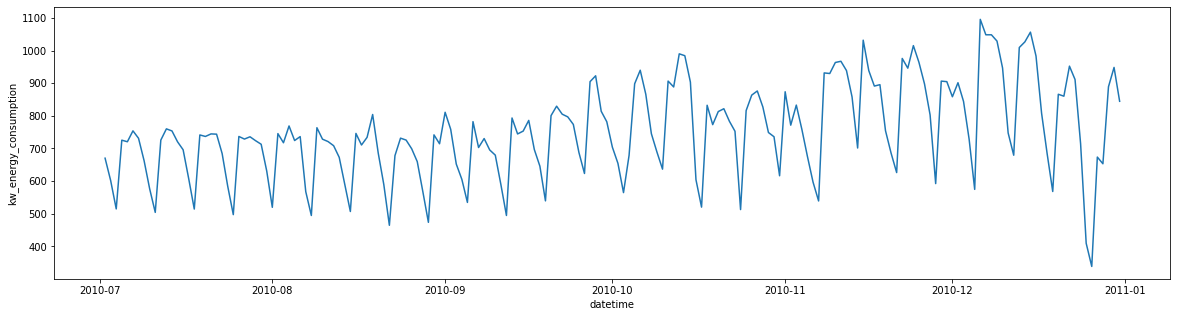

In [ ]:
plot_anomalies(ts, anomalies, s=100);

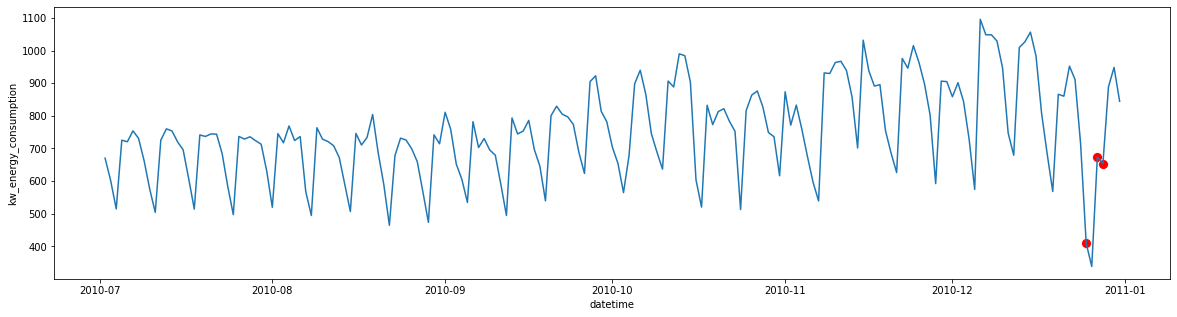

In [ ]:
# M = 1.5
anomalies = smad(ts, period=7, only_low_values=True, m=1.5)
plot_anomalies(ts, anomalies, s=100);